# CDC and Twitter Lyme data EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff


In [2]:
# For Google Colab enable the 3 commented lines of code below. 
# For local env place the data files in the same location as the python notebook
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "/content/drive/MyDrive/CSCI E-597 Pre-Capstone/Lyme_data"


In [3]:
cdcRaw = pd.read_csv("../data/LD-Case-Counts-by-County-00-19.csv")


In [4]:
cdcRaw.head()

,Ctyname,Stname,STCODE,CTYCODE,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
1,Baldwin County,Alabama,1,3,1,0,1,0,0,0,...,0,1,1,0,3,1,2,2,0,0
2,Barbour County,Alabama,1,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Bibb County,Alabama,1,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Blount County,Alabama,1,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0


In [ ]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]


In [ ]:
endpts = list(np.linspace(1, 12, len(colorscale) - 1))

In [6]:
# Let's drop few columns - CtyName, STCODE, CTYCODE
cdcData = cdcRaw.drop(['Ctyname', 'STCODE', 'CTYCODE'], axis=1)


In [7]:
display(cdcData.head())

,Stname,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,Alabama,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
1,Alabama,1,0,1,0,0,0,0,0,0,...,0,1,1,0,3,1,2,2,0,0
2,Alabama,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Alabama,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Alabama,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0


In [8]:
# Let's group by state and see the disease counts across years
cdcData.groupby(['Stname']).sum()[0:7]

,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
Stname,,,,,,,,,,,,,,,,,,,,
Alabama,6,10,11,8,6,3,11,13,9,3,2,24,25,24,64,25,38,41,36,66
Alaska,2,2,3,3,3,4,3,10,6,7,7,11,10,14,8,9,15,10,11,3
Arizona,2,3,4,4,13,10,10,2,8,7,2,15,13,32,21,12,13,28,7,10
Arkansas,7,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,2,6,4,18
California,96,95,97,86,48,95,85,75,74,117,129,92,70,112,73,98,134,145,104,144
Colorado,0,0,1,0,0,0,0,0,3,1,3,0,0,0,0,0,0,4,3,8
Connecticut,3773,3597,4631,1403,1348,1810,1788,3058,3896,4156,3068,3039,2657,2925,2360,2541,1748,2051,1859,1233


In [9]:
cdcData.groupby(['Stname']).groups.keys()

dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

In [10]:
cdcStData = cdcData.groupby(['Stname']).sum()

In [11]:
cdcStData.head()

,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
Stname,,,,,,,,,,,,,,,,,,,,
Alabama,6,10,11,8,6,3,11,13,9,3,2,24,25,24,64,25,38,41,36,66
Alaska,2,2,3,3,3,4,3,10,6,7,7,11,10,14,8,9,15,10,11,3
Arizona,2,3,4,4,13,10,10,2,8,7,2,15,13,32,21,12,13,28,7,10
Arkansas,7,4,3,0,0,0,0,1,0,0,0,0,0,0,0,0,2,6,4,18
California,96,95,97,86,48,95,85,75,74,117,129,92,70,112,73,98,134,145,104,144


**Top 10 Historical Lyme disease counts by states for the years 2000-2019**

In [12]:
cdcStData.sum(axis=1).sort_values(ascending=False)[0:10]

Stname
Pennsylvania     118958
New York          92577
New Jersey        70318
Connecticut       52941
Massachusetts     50113
Wisconsin         36936
Maryland          28390
Minnesota         27857
New Hampshire     18122
Maine             17542
dtype: int64

In [13]:
# The top-10 states with highest disease count for the year 2019

cdcStData['Cases2019'].sort_values(ascending=False)[0:10]


Stname
Pennsylvania     8998
New York         4243
New Jersey       3619
Wisconsin        2178
Maine            2167
New Hampshire    1710
Minnesota        1528
Maryland         1417
Connecticut      1233
Virginia         1199
Name: Cases2019, dtype: int64

In [14]:
cdcStData['Cases2019'][0:4]

Stname
Alabama     66
Alaska       3
Arizona     10
Arkansas    18
Name: Cases2019, dtype: int64

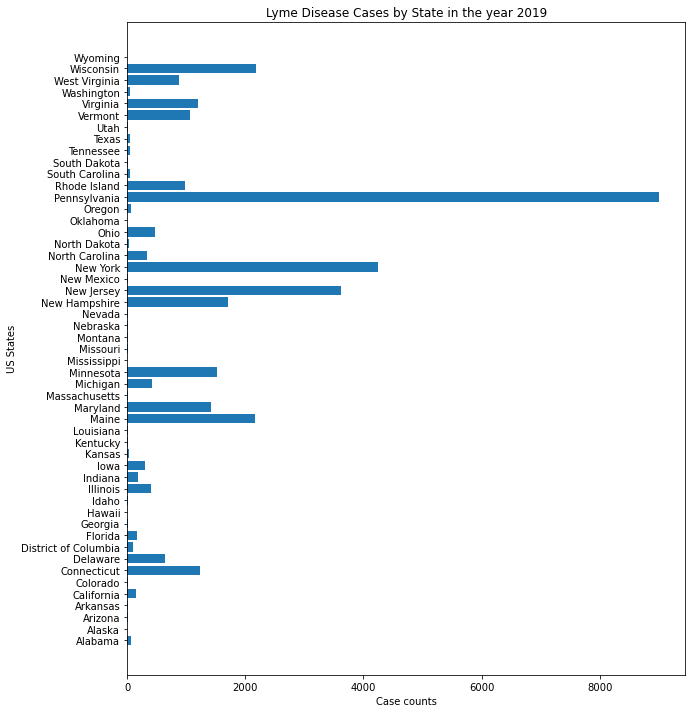

In [15]:
plt.figure(figsize=(10,12))
# plt.xticks(rotation=90)
plt.barh(cdcStData.index, cdcStData['Cases2019'])
plt.title("Lyme Disease Cases by State in the year 2019")
plt.xlabel("Case counts")
plt.ylabel("US States")
plt.show()

In [16]:
# 50 US states and District of Columbia for the year 2010-2019
cdcStData.shape

(51, 20)

In [17]:
# Let's remove the years 2000 - 2009 as that's our range of interest for the research

cdcTenYrs = cdcStData.iloc[:, 10:]
cdcTenYrs.columns=cdcTenYrs.columns.str.lstrip("Cases")

display(cdcTenYrs.shape)
cdcTenYrs.head()

(51, 10)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Stname,,,,,,,,,,
Alabama,2,24,25,24,64,25,38,41,36,66
Alaska,7,11,10,14,8,9,15,10,11,3
Arizona,2,15,13,32,21,12,13,28,7,10
Arkansas,0,0,0,0,0,0,2,6,4,18
California,129,92,70,112,73,98,134,145,104,144


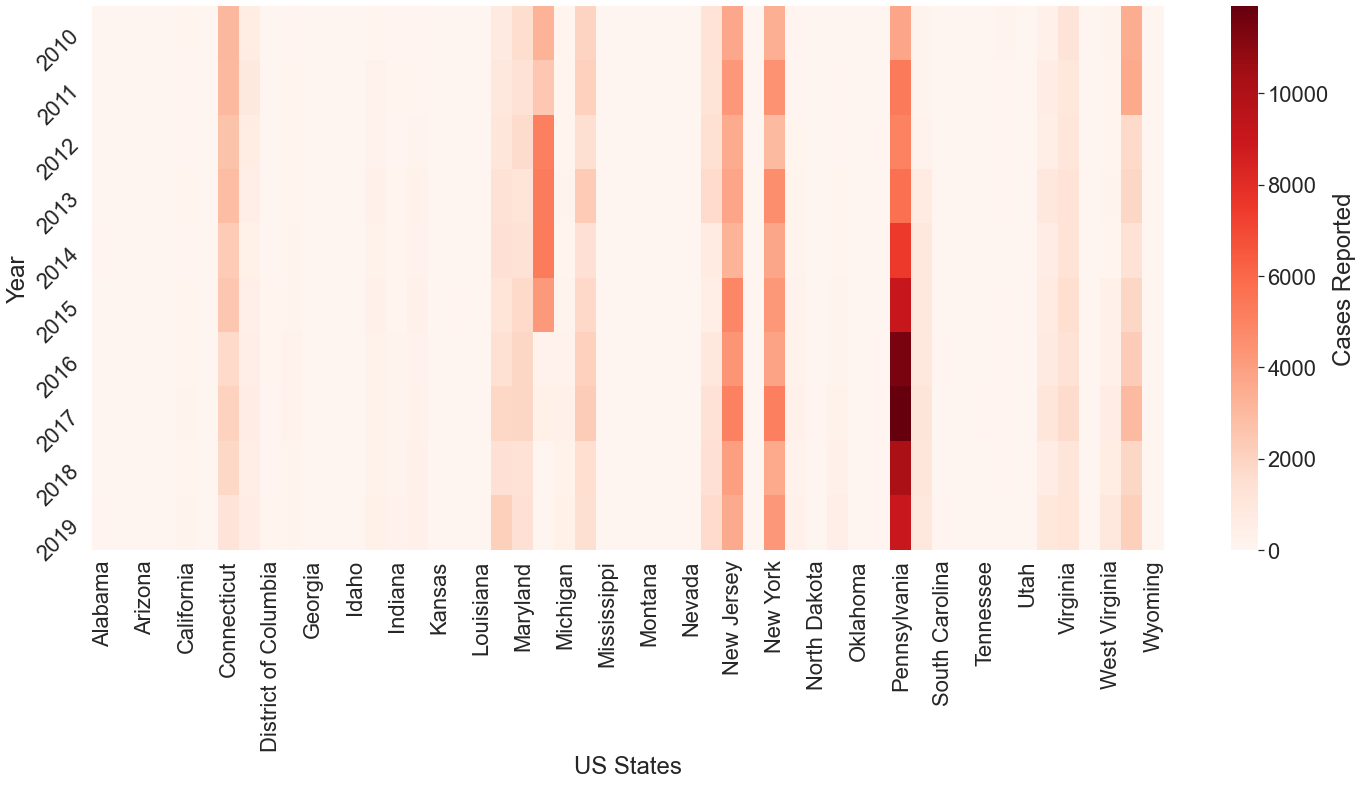

In [20]:
# sns.set()
sns.set(rc={'figure.figsize':(24,10)}, font_scale=2)
ax1 = sns.heatmap(cdcTenYrs.transpose(), cmap="Reds", cbar_kws={'label': 'Cases Reported'})
plt.xlabel("US States")
plt.ylabel("Year")
plt.yticks(rotation=45)
# plt.xticks(rotation=80)
plt.show()

## Let's normalize the case counts by the population of each state in the corresponding year (2010-2019)

In [21]:
poplByYr = pd.read_csv("../data/cleaned_us_state_population_by_year.csv", index_col = 'State')
poplByYr.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,
Alabama,"4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
Alaska,"713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
Arizona,"6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
Arkansas,"2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
California,"37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"


In [22]:
poplByYr = poplByYr.apply(lambda x: x.str.replace(',', ''))
poplByYr.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,
Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


In [23]:
poplByYr = poplByYr.apply(lambda x: x.astype(int))
poplByYr.dtypes

2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
dtype: object

In [24]:
# Divide the population by 100,000 as we are interested in finding cases per every 100,000

poplBy100k = poplByYr.div(100000)
print(poplBy100k.dtypes)
poplBy100k.head()

2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
dtype: object


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,
Alabama,47.85437,47.99069,48.15588,48.30081,48.41799,48.52347,48.63525,48.74486,48.87681,49.03185
Alaska,7.13910,7.22128,7.30443,7.37068,7.36283,7.37498,7.41456,7.39700,7.35139,7.31545
Arizona,64.07172,64.72643,65.54978,66.32764,67.30413,68.29676,69.41072,70.44008,71.58024,72.78717
Arkansas,29.21964,29.40667,29.52164,29.59400,29.67392,29.78048,29.89918,30.01345,30.09733,30.17804
California,373.19502,376.38369,379.48800,382.60787,385.96972,389.18045,391.67117,393.58497,394.61588,395.12223


In [25]:
# Finally, divide number of cases in each state by the population of that year
cdcTenYrs.div(poplBy100k)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Stname,,,,,,,,,,
Alabama,0.041793,0.500097,0.519147,0.496886,1.321823,0.515215,0.781326,0.841114,0.736546,1.346064
Alaska,0.980516,1.523276,1.369032,1.899418,1.086539,1.220342,2.023047,1.351899,1.496316,0.410091
Arizona,0.031215,0.231745,0.198323,0.482453,0.312017,0.175704,0.187291,0.397501,0.097792,0.137387
Arkansas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066891,0.199910,0.132902,0.596460
California,0.345664,0.244431,0.184459,0.292728,0.189134,0.251811,0.342124,0.368408,0.263547,0.364444
Colorado,0.059437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071277,0.052712,0.138919
Connecticut,85.719538,84.692317,73.917520,81.366603,65.655425,70.836732,48.852183,57.397972,52.050668,34.583471
Delaware,72.921866,96.210963,73.100454,55.111870,44.719122,46.215041,53.323722,63.543623,53.859276,65.827038
District of Columbia,6.939556,0.000000,0.000000,5.379807,6.039304,17.915309,15.018627,12.087966,11.260828,14.169343


## Let's look at some tweet counts for Time Series Forecasting

In [74]:
twtrRaw = pd.read_csv("../data/carmen_tweets_keywords_pos.csv")

/Users/sxb592/opt/anaconda3/envs/cs109b/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
twtrRaw.head()
twtrCopy = twtrRaw.copy()

In [76]:
twtrRaw.columns[0:2]

Index(['Unnamed: 0', 'Unnamed: 0.1'], dtype='object')

In [77]:
twtrCopy.head()

,Unnamed: 0,Unnamed: 0.1,id,text,author_id,public_metrics,created_at,in_reply_to_user_id,conversation_id,reply_settings,source,referenced_tweets,context_annotations,entities,user,user_name,city,state,county,country
0,0,0,20956486280679425,"If chronic wasting disease & Lyme aren't enuf,...",41497253,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2010-12-31T21:36:30.000Z,NaN,20956486280679425,everyone,Twitter Web Client,NaN,NaN,NaN,"{'public_metrics': {'followers_count': 128, 'f...",peak2wave,Virginia Beach,Virginia,Virginia Beach City,United States
1,1,1,20894962665132032,My dog contracted Lyme disease. I have several...,76048819,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2010-12-31T17:32:01.000Z,NaN,20894962665132032,everyone,TweetDeck,NaN,NaN,"{'annotations': [{'start': 63, 'end': 69, 'pro...","{'public_metrics': {'followers_count': 3088, '...",DrFoxVet,Winston-Salem,North Carolina,Forsyth County,United States
2,8,8,20820073241387009,http://bit.ly/ikrOgy Weird Skin With Chronic L...,119030636,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2010-12-31T12:34:26.000Z,NaN,20820073241387009,everyone,Twitter Web Client,NaN,NaN,NaN,"{'public_metrics': {'followers_count': 47, 'fo...",zeruelb,Jacksonville,Florida,Duval County,United States
3,9,9,20820036151156736,Weird Skin With Chronic Lyme Disease Pictures?...,118625413,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2010-12-31T12:34:18.000Z,NaN,20820036151156736,everyone,Twitter Web Client,NaN,NaN,NaN,"{'public_metrics': {'followers_count': 235, 'f...",aelanekf,Fort Worth,Texas,Tarrant County,United States
4,10,10,20759652782309377,What are the symptoms of lyme disease in a dog...,119004023,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2010-12-31T08:34:21.000Z,NaN,20759652782309377,everyone,Twitter Web Client,NaN,NaN,NaN,"{'public_metrics': {'followers_count': 40, 'fo...",bbradn,Mesa,Arizona,Maricopa County,United States


In [78]:
twtrRaw.drop(columns = twtrRaw.columns[0:2], inplace = True)
twtrRaw.drop(columns = ['id', 'author_id'], inplace = True)
twtrRaw.drop(columns = ['public_metrics', 'in_reply_to_user_id'], inplace = True)
twtrRaw.drop(columns = ['reply_settings', 'source', 'referenced_tweets'], inplace = True)
twtrRaw.drop(columns = ['context_annotations', 'entities', 'user', 'user_name'], inplace = True)
twtrRaw.drop(columns = ['city', 'country'], inplace = True)



In [79]:
twtrRaw.head()

,text,created_at,conversation_id,state,county
0,"If chronic wasting disease & Lyme aren't enuf,...",2010-12-31T21:36:30.000Z,20956486280679425,Virginia,Virginia Beach City
1,My dog contracted Lyme disease. I have several...,2010-12-31T17:32:01.000Z,20894962665132032,North Carolina,Forsyth County
2,http://bit.ly/ikrOgy Weird Skin With Chronic L...,2010-12-31T12:34:26.000Z,20820073241387009,Florida,Duval County
3,Weird Skin With Chronic Lyme Disease Pictures?...,2010-12-31T12:34:18.000Z,20820036151156736,Texas,Tarrant County
4,What are the symptoms of lyme disease in a dog...,2010-12-31T08:34:21.000Z,20759652782309377,Arizona,Maricopa County


In [80]:
twtrRaw.state.value_counts()[0:6]

California              23844
New York                20320
District of Columbia    10576
Texas                   10415
Massachusetts            9659
Pennsylvania             8867
Name: state, dtype: int64

In [81]:
twtrRaw.county.value_counts()[0:6]

New York County         12794
District of Columbia    10576
Los Angeles County       9833
Suffolk County           6479
Cook County              5148
Fairfield County         4370
Name: county, dtype: int64

# Remove duplicate tweets based on conversation_id


In [82]:
before = len(twtrRaw)
print("Count of tweets:", before)
twtrRaw.drop_duplicates(subset=['conversation_id'], inplace=True)
after = len(twtrRaw)
print("Count of duplicate tweets:", before-after)
print("Count of remaining tweets:", after)


Count of tweets: 179077
Count of duplicate tweets: 8388
Count of remaining tweets: 170689


In [83]:
# Remove the coversation_id column
twtrRaw.drop(columns=['conversation_id'], inplace=True)
twtrRaw.head()

,text,created_at,state,county
0,"If chronic wasting disease & Lyme aren't enuf,...",2010-12-31T21:36:30.000Z,Virginia,Virginia Beach City
1,My dog contracted Lyme disease. I have several...,2010-12-31T17:32:01.000Z,North Carolina,Forsyth County
2,http://bit.ly/ikrOgy Weird Skin With Chronic L...,2010-12-31T12:34:26.000Z,Florida,Duval County
3,Weird Skin With Chronic Lyme Disease Pictures?...,2010-12-31T12:34:18.000Z,Texas,Tarrant County
4,What are the symptoms of lyme disease in a dog...,2010-12-31T08:34:21.000Z,Arizona,Maricopa County


In [84]:
# Merge state and county columns to make county name unique as the same county name exists in multiple states
twtrRaw['county-state'] = twtrRaw[['county', 'state']].agg('-'.join, axis=1)
twtrRaw['county-state'].head()

0     Virginia Beach City-Virginia
1    Forsyth County-North Carolina
2             Duval County-Florida
3             Tarrant County-Texas
4          Maricopa County-Arizona
Name: county-state, dtype: object

In [85]:
twtrRaw.head()

,text,created_at,state,county,county-state
0,"If chronic wasting disease & Lyme aren't enuf,...",2010-12-31T21:36:30.000Z,Virginia,Virginia Beach City,Virginia Beach City-Virginia
1,My dog contracted Lyme disease. I have several...,2010-12-31T17:32:01.000Z,North Carolina,Forsyth County,Forsyth County-North Carolina
2,http://bit.ly/ikrOgy Weird Skin With Chronic L...,2010-12-31T12:34:26.000Z,Florida,Duval County,Duval County-Florida
3,Weird Skin With Chronic Lyme Disease Pictures?...,2010-12-31T12:34:18.000Z,Texas,Tarrant County,Tarrant County-Texas
4,What are the symptoms of lyme disease in a dog...,2010-12-31T08:34:21.000Z,Arizona,Maricopa County,Maricopa County-Arizona


In [86]:
twtrRaw['month'] = pd.DatetimeIndex(twtrRaw['created_at']).month
twtrRaw['year'] = pd.DatetimeIndex(twtrRaw['created_at']).year


In [87]:
twtrRaw.head()

,text,created_at,state,county,county-state,month,year
0,"If chronic wasting disease & Lyme aren't enuf,...",2010-12-31T21:36:30.000Z,Virginia,Virginia Beach City,Virginia Beach City-Virginia,12,2010
1,My dog contracted Lyme disease. I have several...,2010-12-31T17:32:01.000Z,North Carolina,Forsyth County,Forsyth County-North Carolina,12,2010
2,http://bit.ly/ikrOgy Weird Skin With Chronic L...,2010-12-31T12:34:26.000Z,Florida,Duval County,Duval County-Florida,12,2010
3,Weird Skin With Chronic Lyme Disease Pictures?...,2010-12-31T12:34:18.000Z,Texas,Tarrant County,Tarrant County-Texas,12,2010
4,What are the symptoms of lyme disease in a dog...,2010-12-31T08:34:21.000Z,Arizona,Maricopa County,Maricopa County-Arizona,12,2010


In [88]:
twtrRaw.drop(columns=['created_at'], inplace=True)


In [90]:
twtrRaw.drop(columns=['county'], inplace=True)

twtrRaw.head()

,text,state,county-state,month,year
0,"If chronic wasting disease & Lyme aren't enuf,...",Virginia,Virginia Beach City-Virginia,12,2010
1,My dog contracted Lyme disease. I have several...,North Carolina,Forsyth County-North Carolina,12,2010
2,http://bit.ly/ikrOgy Weird Skin With Chronic L...,Florida,Duval County-Florida,12,2010
3,Weird Skin With Chronic Lyme Disease Pictures?...,Texas,Tarrant County-Texas,12,2010
4,What are the symptoms of lyme disease in a dog...,Arizona,Maricopa County-Arizona,12,2010


In [91]:
twtrRaw.tail()

,text,state,county-state,month,year
179072,@cali_oranged @collbradan It will help control...,Pennsylvania,Northumberland County-Pennsylvania,1,2021
179073,Please help our #Resister sister Julie! ❤🙏 #Ly...,Alaska,Kenai Peninsula Borough-Alaska,1,2021
179074,@AOC I want to agree with everything you said ...,Florida,Hillsborough County-Florida,1,2021
179075,Mini recap of my 2020: 👩🏼‍💻Left an unhealthy j...,District of Columbia,District of Columbia-District of Columbia,1,2021
179076,So what makes sense for writing new services w...,California,Los Angeles County-California,1,2021
